<a href="https://colab.research.google.com/github/AkshayYede/Hotel-Bookings-Analysis/blob/main/Hotel_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Hotel Booking Analysis**

# **Project Summary**

This Hotel Booking Analysis EDA project delves into cancellations and their underlying patterns, proposing strategies to mitigate cancellations and enhance revenue.

The project examines booking data for both a city hotel and a resort hotel, encompassing details such as booking dates, length of stay, and guest demographics. It navigates through the fundamental stages of EDA and visualization.

In this endeavor, I will conduct Exploratory Data Analysis on the provided dataset, aiming to identify actionable insights. For instance, hotels might consider offering early booking discounts or extended stay promotions to incentivize guests. Moreover, providing perks like complimentary parking or breakfast for direct bookings could sway customers away from third-party platforms.

This EDA comprises three primary phases:
1. Exploration and scrutiny of raw data.
2. Data refinement, addressing null values, and removing irrelevant entries.
3. Analysis breakdown:
   - Univariate analysis: Examining individual variables.
   - Bivariate analysis: Investigating relationships between pairs of variables.
   - Multivariate analysis: Exploring interactions among multiple variables.

By scrutinizing hotel booking data and deciphering cancellation trends, hotels can strategize to curtail cancellations and bolster revenue streams.

# **Problem Statement**

This report aims to investigate the significant increase in cancellation rates observed at both City Hotel and Resort Hotel over recent years. These hotels are currently encountering numerous challenges, including a decline in revenue and underutilization of their room inventory, largely attributed to these high cancellation rates.

Consequently, the primary goal for both hotels is to mitigate cancellation rates to improve the efficiency of revenue generation. Our examination will explore hotel booking cancellations and other relevant factors affecting their operations and annual revenue.

## **Let's Begin !**

#**1. Know Your Data**

## Importing Libraries

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

## Loading Dataset

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Hotel Bookings.csv')

## Dataset First View

In [ ]:
#dataset first look
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#looking first five rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#looking last five rows of the dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## Dataset Information

In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking the shape of the dataset
df.shape

(119390, 32)

## Duplicate Values

In [ ]:
#duplicate value count
df.duplicated().sum()

31994

In [ ]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#checking the shape of the dataset after dropping duplicates
df.shape

(87396, 32)

## Missing Values

In [ ]:
#Missing values count
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


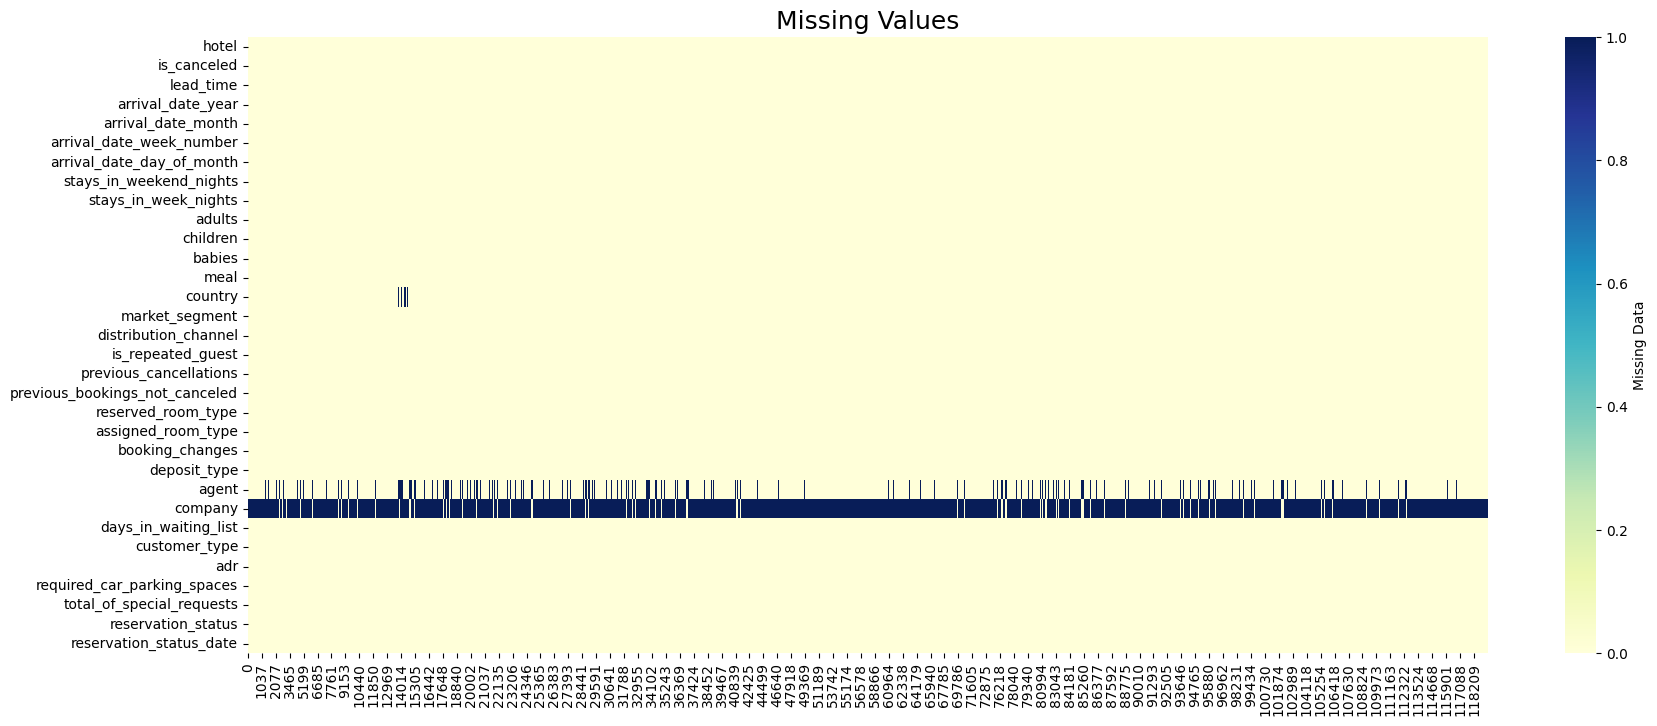

In [ ]:
#visualizing the missing values using seabron heatmap

plt.figure(figsize=(20,8))
sns.heatmap(df.isna().transpose(), cmap='YlGnBu',cbar_kws={'label':'Missing Data'})
plt.title('Missing Values', fontsize=18)
plt.show()



We can see that there are total four columns with missing/null values: company, agent, country, children.
1. In children column, I will replace null values with 0 assuming that customer did not have any children. 2. Column country has null values. I will reolace null values in this column with 'Others' assuming customer's country was not mentioned while booking.
3. In company and agent column it might be a case when customers did not book hotel through them so these columns might have null values in it. As these 2 columns have numeric data in it, I will replace them with 0.

# **2. Understanding Variables**

In [ ]:
#dataset columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#describe the dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Variables Description

**Hotel** : (Resort Hotel or City Hotel)

**is_canceled**: Value indicating if the booking was canceled (1) or not (0)

**lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year**: Year of arrival date

**arrival_date_month**: Month of arrival date

**arrival_date_week_number**: Week number of year for arrival date

**arrival_date_day_of_month**: Day of arrival date

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the
guest stayed or booked to stay at the hotel

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults**: Number of adults

**children**: Number of children

**babies**: Number of babies

**meal**: Type of meal booked. Categories are presented in standard hospitality meal packages

**country**: Country of origin.

**market_segment**: Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"

**distribution_channel**: Booking distribution channel. The term “TA" means "Travel Agents” and “TO” means "Tour Operators"

**is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type**: Code for the type of room assigned to the booking.

**booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type**: Indication on if the customer made a deposit to guarantee the booking.

**agent**: ID of the travel agency that made the booking

**company**: ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type**: Type of booking, assuming one of four categories

**adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking spaces**: Number of car parking spaces required by the customer

**total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**: Reservation last status, assuming one of three categories
**Canceled** - booking was canceled by the customer **Check-Out** - customer has checked in but already departed **No-Show** - customer did not
check-in and did inform the hotel of the reason why **reservation_status_date** - Date at which the last status was set

## Checking unique values

In [ ]:
#checking unique values
pd.Series({col:df[col].unique() for col in df})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

# **3. Data Wrangling**

## Data Wrangling Code

In [ ]:
#creating a duplicate of the original dataset
df1 = df.copy()

In [ ]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#replacing the null values
df1['children'].fillna(0,inplace=True)
df1['company'].fillna(0,inplace=True)
df1['agent'].fillna(0,inplace=True)
df1['country'].fillna('Others',inplace=True)

In [ ]:
#checking for the null values
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
#dropping 'company' column as it contain lot of null values
df1.drop(['company'], axis=1, inplace=True)

In [ ]:
#dropping rows where no adults, children and babies are available because no bookings were made that day

no_guest = df1[df1['adults']+df1['babies']+df1['children'] == 0]
df1.drop(no_guest.index, inplace=True)

In [ ]:
#adding new columns

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']

df1['total_stay'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

In [ ]:
#check first five rows of the dataset
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [ ]:
#check last five rows of the dataset
df1.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,9.0,0,Transient,151.20,0,2,Check-Out,2017-09-07,2.0,9


In [ ]:
#Checking the shape of the dataset
df1.shape

(87230, 33)

In [ ]:
#checking the unique values which is to be analysed
pd.Series({col:df1[col].unique() for col in df1})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                             [0, 1, 2,

## Manipulations and Insights

Created a copy of the dataset before doing any manipulation then filled missing values with 0 in children, company and agent columns as those columns had numerical values and in column country filled missing values with 'others'.

After dealing with missing values I dropped the country column as this had 96% missing values and was of no use in our analysis. In next step I created 2 new columns named 'total_people' and 'total_stay' for further analysis. In total people column I added all the babies, children and adults. similarly in second new column I added weekend stay and week stay column.

After doing all the manipulation I checked new manipulated dataset to check if this is ready to be analyzed.
After manipulating the dataset these were the insights I found:
1. There are 2 types of hotel which guests could book so I can find which type of hotel was booked most.
2. There are different types of guests and they come from different countries.
3. Guests can choose different foods from the menu.
4. Guests can book hotel directly or through different channels that are available.
5. Guests can cancel their booking and there are repeated guests also.
6. Guests can choose rooms of their liking while booking.
7. There is column available in the dataset named 'adr' which could be used to analyze hotel's performance on the basis of revenue.

# **4. Data Visualization and Storytelling**

## Most Preffered Hotel

In [ ]:
#storing unique hotels in a variable
hotel_name = df1['hotel'].unique()

#checking the number of unique booking
unique_booking = df1.hotel.value_counts()

#creating donut chart
fig = px.pie(names=hotel_name, values=unique_booking, hole=0.5, color=hotel_name,
             color_discrete_map={'Resort Hotel':'teal', 'City Hotel':'nude'})

#giving title and updating the text info
fig.update_traces(textinfo='percent + value')
fig.update_layout(title_text='Hotel Booking Percentage', title_x = 0.5)

#setting the legend at centre

fig.update_layout(legend=dict(orientation='h',yanchor='bottom',xanchor='center',x=0.5))

#display the figure
fig.show()

From the above Donut Chart, I found that guests prefer Resort Hotel over City Hotel.

This insight is useful for the stakeholder to check which hotel is performing best and they can invest more capitals. There is no such negative growth but stakeholders can focus more on City Hotel to get more bookings and increase the overall revenue.

## Bookings Cancellation Percentage

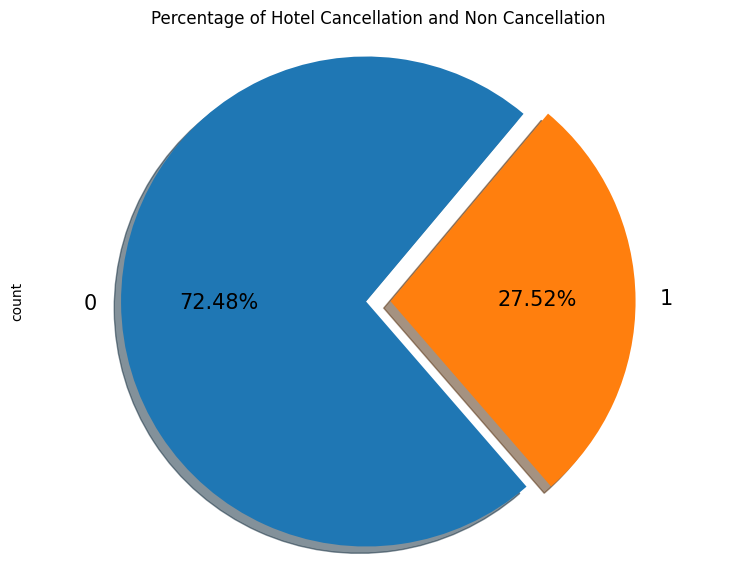

In [ ]:
#storing unique values in a variable
cancelled_hotel = df1.is_canceled.value_counts()

#creating pie chart
cancelled_hotel.plot.pie(figsize=(9,7), explode=(0.05, 0.05), autopct='%1.2f%%', shadow=True, fontsize=15, startangle=50)

#giving the title
plt.title("Percentage of Hotel Cancellation and Non Cancellation")
plt.axis('equal')

#show the pie chart
plt.show()

From the above pie chart, we can see that 72.48% bookings are not cancelled by guests but aroung 27.52% bookings are cancelled.

This insight will help stakeholders in comparing the cancellation and non cancellation of bookings. Stakeholders can offer rescheduling the bookings instead of cancellation and set a flexible cancellation policy to reduce booking cancellation

## Most Preffered Meal Type

<ipython-input-30-01596c6cf124>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



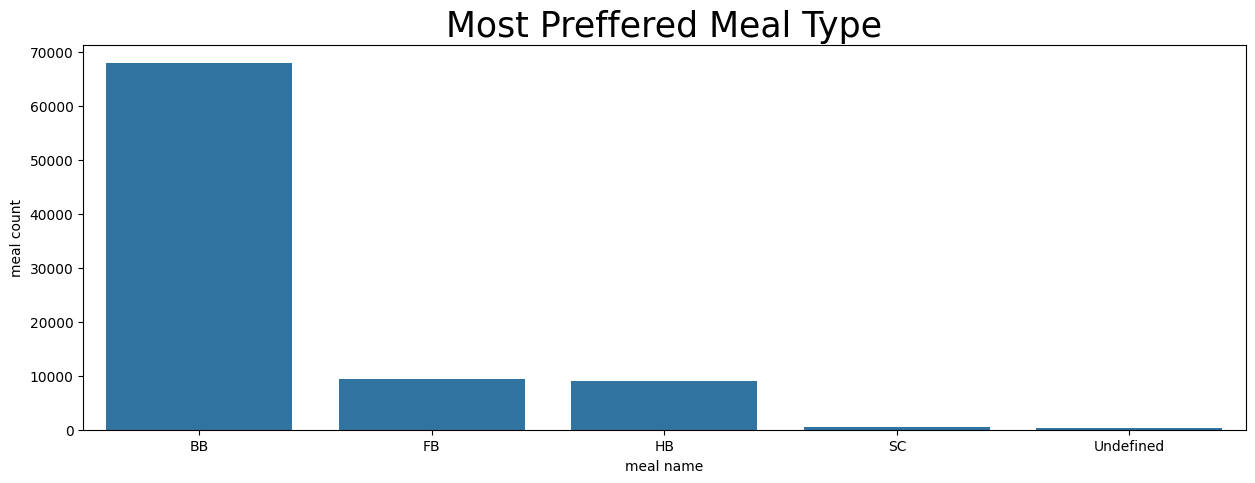

In [ ]:
#counting each meal type
meal_count = df1.meal.value_counts()

#extracting each meal types and storing in a variable
meal_name = df1['meal'].unique()

#creating a dataset of each meal type and count
meal_df = pd.DataFrame(zip(meal_name, meal_count), columns=['meal name', 'meal count'])

#visualize on the bar chart
plt.figure(figsize=(15,5))
fig = sns.barplot(data=meal_df, x='meal name', y='meal count')
fig.set_xticklabels(meal_df['meal name'])
plt.title('Most Preffered Meal Type', fontsize=25)
plt.show()

**Meal Type Variable Description**

**BB** - Bed and Breakfast

**HB** - Half Board

**FB** - Full Board

**SC** - Self Catering

After visualizing the above chart we can see that BB - Bed and Breakfast is the most preffered meal type by guests.

From the gained insights, stakeholders should arrange raw material for this meaal in advance and deliever the meal without any delay.

## Bookings

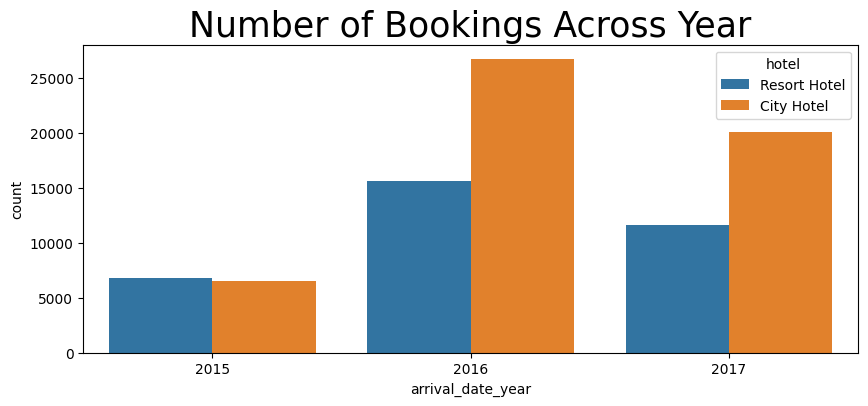

In [ ]:
#plotting the countplot
plt.figure(figsize=(10,4))
sns.countplot(x=df1['arrival_date_year'], hue=df1['hotel'])
plt.title("Number of Bookings Across Year", fontsize=25)
plt.show()

From above bar graph, we found that most hotel bookings done in year 2016.

We can see that number of bookings were declined after year 2016. Stakeholders can know what went wrong after 2016 and fix that problem to increase the number of bookings. One way to do this is ask for feedbacks from guests and have a meeting with old employees who else serving in the year 2016.

## Hotel wise Booking by Month

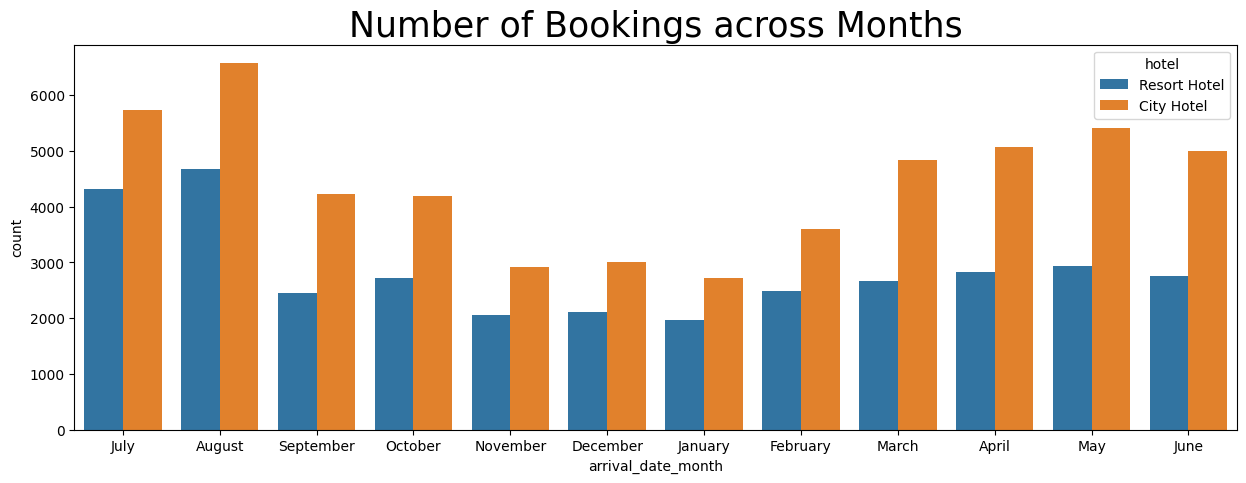

In [ ]:
#visualizing countplot
plt.figure(figsize=(15,5))
sns.countplot(x=df1['arrival_date_month'], hue=df1['hotel'])
plt.title("Number of Bookings across Months", fontsize=25)
plt.show()

Above bar graph shows that August and July were two most busy months in compare to others.

Hotel can use this insight to arrange everything in advance and welcome their guest in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

## Number of Guests from Each Country

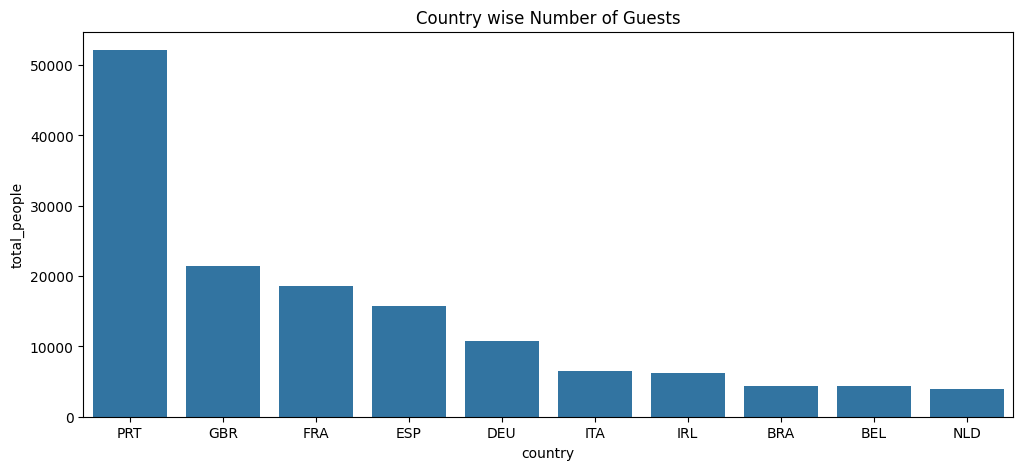

In [ ]:
#visualizing Number of guests from each country
guests = pd.DataFrame(df1[['country','total_people']])
guests_df = guests.groupby(['country'])['total_people'].sum()
guests_df.sort_values(ascending=False, inplace=True)
top_10_countries = guests_df.head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_10_countries.index,y=top_10_countries).set(title='Country wise Number of Guests')
plt.show()

From the above chart we found that most guess are come from PRT(Portugal).

There is a neagative insight. After knowing the most of the guests are come from Portugal, hotels can add more Portugal cuisines in their menu to make guests order more food.

## Most used Distribution Channel

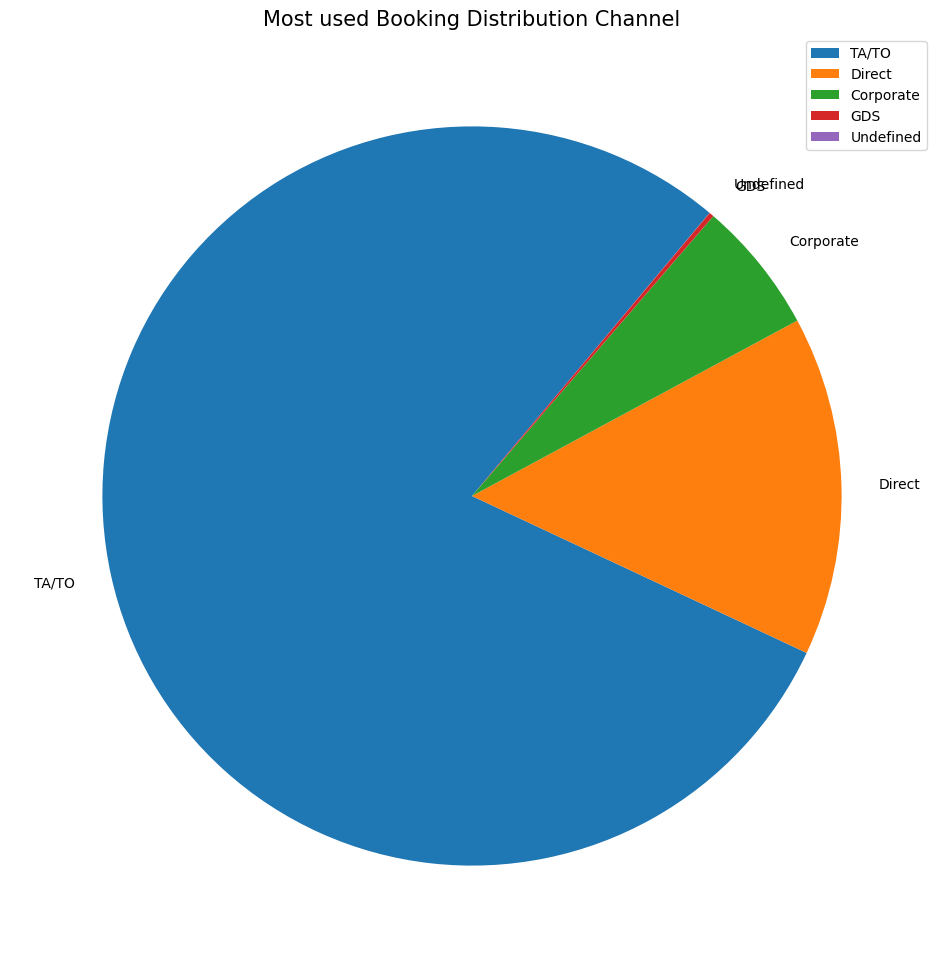

In [ ]:
#creating a dataset of distribution channel name and count
dist_df = df1['distribution_channel'].value_counts().reset_index()
#renaming columns
dist_df = dist_df.rename(columns={'distribution_channel':'Channel Name','count':'Channel Count'})
plt.figure(figsize=(20,12))
#plotting pie chart
plt.pie(dist_df['Channel Count'].tolist(), labels = dist_df['Channel Name'].tolist(), startangle=50)
plt.legend(labels=dist_df['Channel Name'])
plt.title('Most used Booking Distribution Channel',fontsize=15)
plt.show()

From the above insight it is clear that TA/TO is the most used distribution channel by guests.

So, hotels can run promotional offers to motivate other channels to contribute more in bookings.

## Most Prefferd Room Type

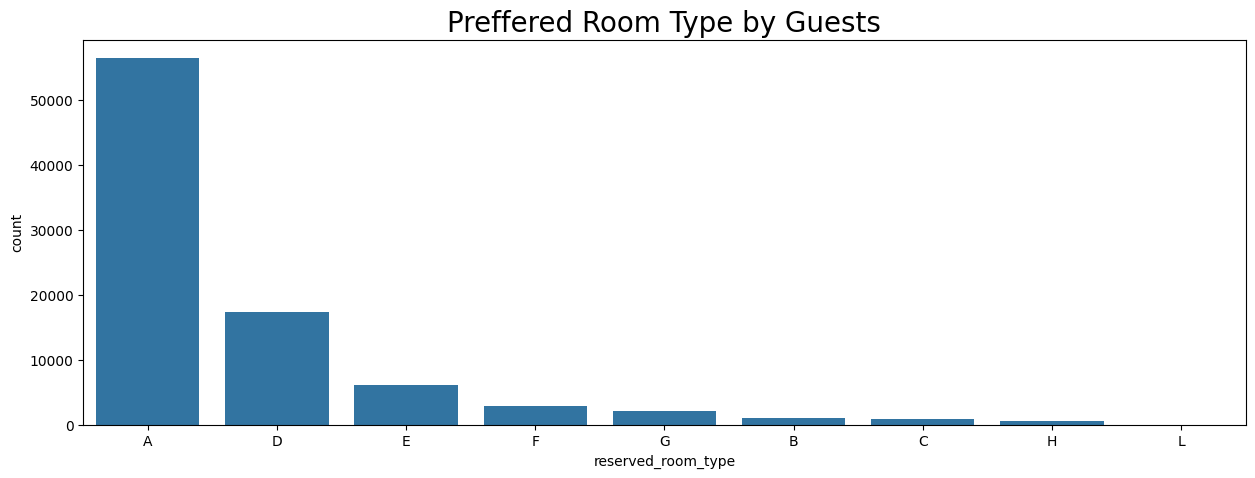

In [ ]:
plt.figure(figsize=(15,5))

#plotting the values in chart
sns.countplot(x=df1['reserved_room_type'], order=df1['reserved_room_type'].value_counts().index)

#setting title
plt.title('Preffered Room Type by Guests', fontsize=20)
plt.show()

From the above chart we can understand that the room type A is the most preffered by the guest while booking the hotel.

As it is clear that room type A is the most used room type, hotel should increase the number of A type room to maximize the revenue.

## Most Assigned Room Type

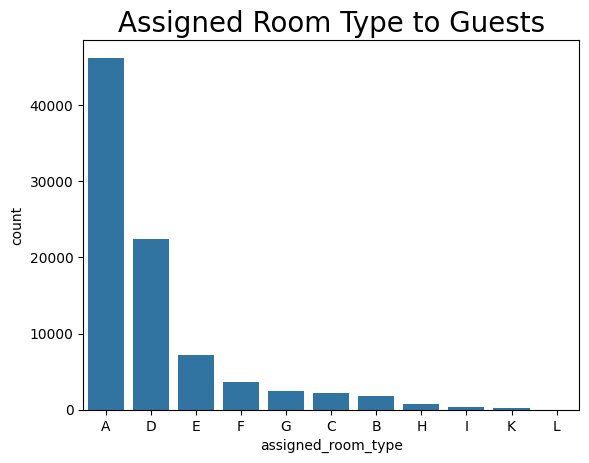

In [ ]:
sns.countplot(x=df1['assigned_room_type'], order=df1['assigned_room_type'].value_counts().index)

#setting the title
plt.title('Assigned Room Type to Guests', fontsize=20)
plt.show()

From the above chart it is clear that room type A is most assigned to the guests.

In this chart we saw that around 55,000 guests preffered room type A but 45,000 people were assigned A type room. This could be a reason to cancel the bookings. Hotel could increase A type room to decrease cacellation.

## Percentage of Repeated Guests

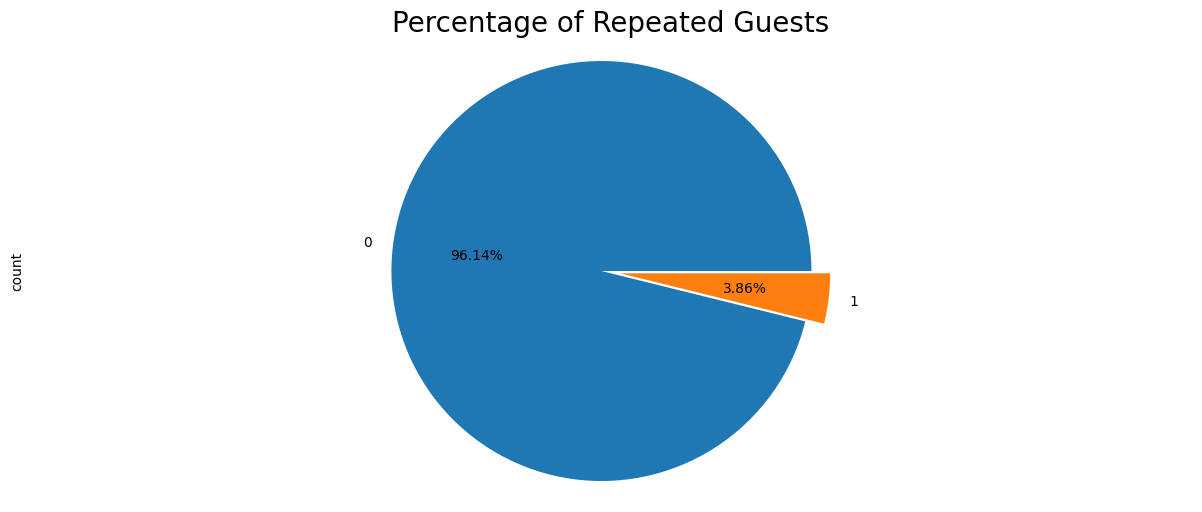

In [ ]:
#creating a variable containing guests with their repeated counts
rep_guests = df1['is_repeated_guest'].value_counts()

#plotting the values in a pie chart
rep_guests.plot.pie(autopct='%1.2f%%', explode=(0.00,0.09), figsize=(15,6), shadow=False)

#setting the title
plt.title('Percentage of Repeated Guests', fontsize=20)
plt.axis('equal')
plt.show()

From the above chart we can see that 3.86% guests are repeated guests.

We can see that number of repeated guests is very low and it shows negative growth of the hotel. Hotel can offer loyalty discount to their guests to increase repeated guests.

## Booking by the Customer Type

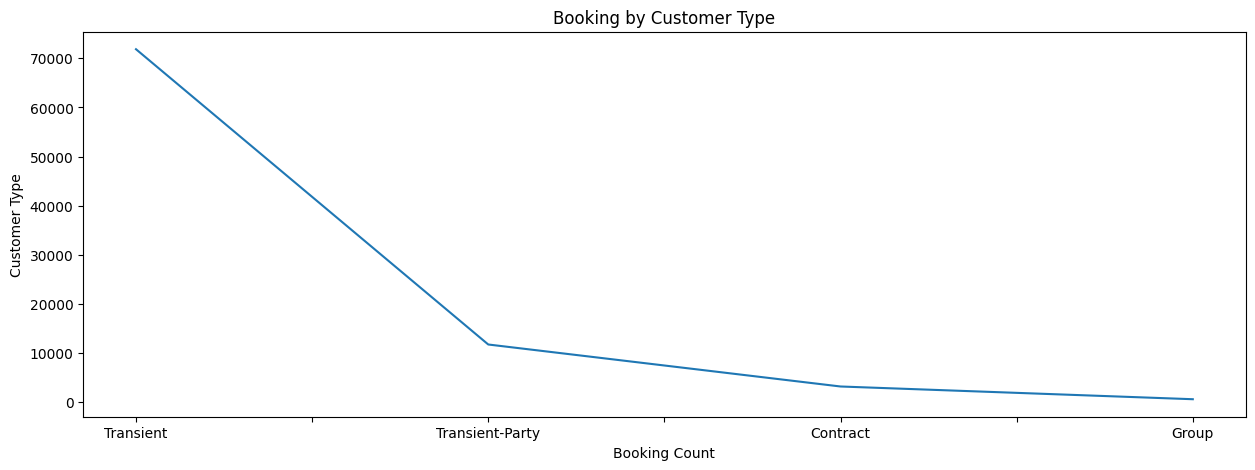

In [ ]:
cust_type = df1['customer_type'].value_counts()

#plotting the values in a line chart
cust_type.plot(figsize=(15,5))

#setting the x label, y label and title
plt.xlabel('Booking Count')
plt.ylabel('Customer Type')
plt.title('Booking by Customer Type')
plt.show()

We can see that Transient customer types has the most number of bookings.

To solve this issue, hotel can run promotional offers to increase the number of bookings over other categories, such as discount for the groups.

## Most Preffered Deposite Type

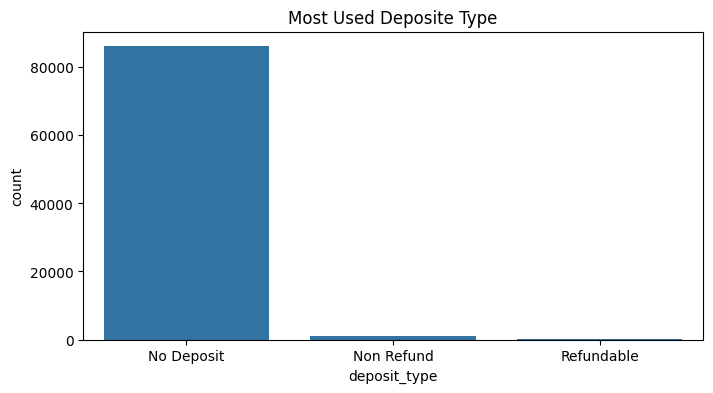

In [ ]:
#counting each deposite type
deposite = df1['deposit_type'].value_counts().index

#setting the chart size
plt.figure(figsize=(8,4))

#plotting the values
sns.countplot(x=df1['deposit_type'], order=deposite)
plt.title('Most Used Deposite Type')
plt.show()

## Number of Stays

<ipython-input-111-92021595b8e1>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



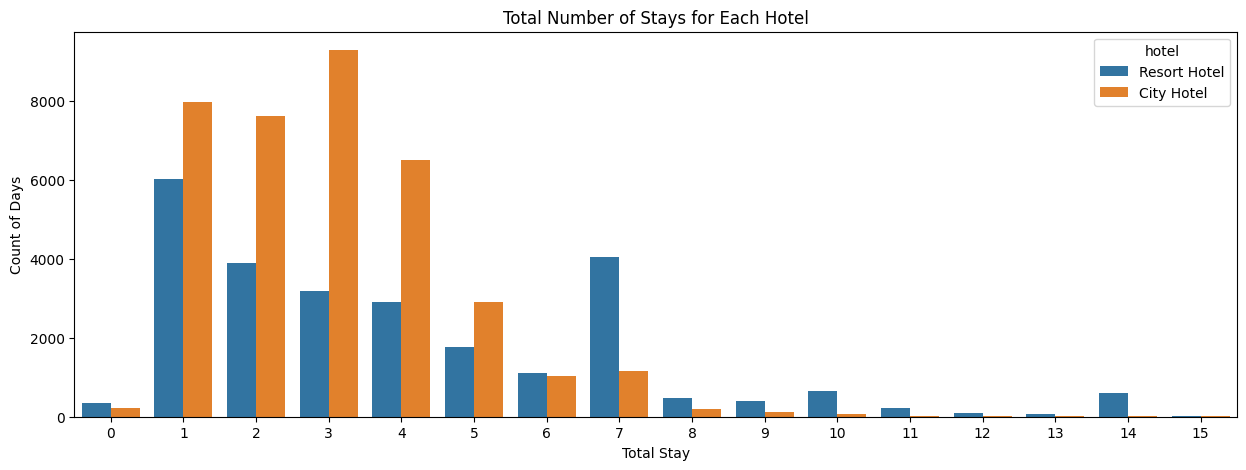

In [ ]:
#creating a not canceled dataframe
not_canceled_df = df1[df['is_canceled']==0]
hotel_stay = not_canceled_df[not_canceled_df['total_stay'] <= 15]

#setting the plot size and plotting bar chart
plt.figure(figsize=(15,5))
sns.countplot(x=hotel_stay['total_stay'], hue=hotel_stay['hotel'])

#adding the label to the chart
plt.title('Total Number of Stays for Each Hotel')
plt.xlabel('Total Stay')
plt.ylabel('Count of Days')
plt.show()

From the above chart we can see that in City Hotel most people stay for 3 days and in Resort Hotels most people stay for only 1 day.

Hotel should work on to increase total stay in Resort Hotel to increase revenue.

##Average Daily Rate of Hotels

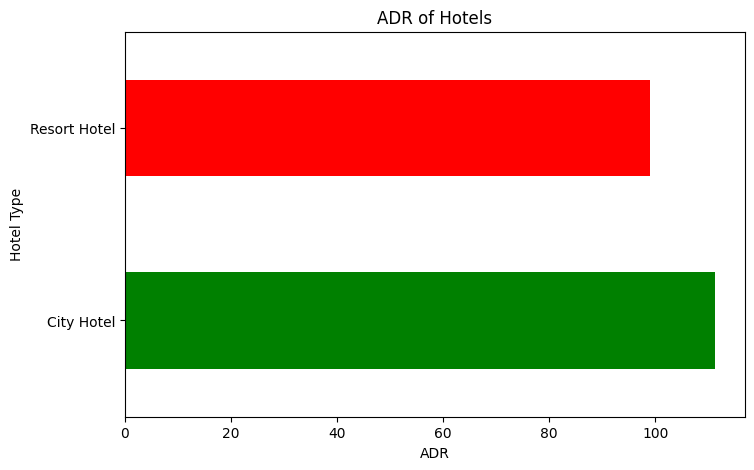

In [ ]:
avg_adr = df1.groupby('hotel')['adr'].mean()

#plotting the graph
plt.subplots(figsize=(8,5))
avg_adr.plot(kind = 'barh', color=('g','r'))
plt.xlabel('ADR')
plt.ylabel('Hotel Type')
plt.title('ADR of Hotels')
plt.show()

The resulting horizontal bar graph shows that City Hotels has high Average Daily Rates and Resort Hotels have low Average Daily Rates.

## Revenue by the Hotel

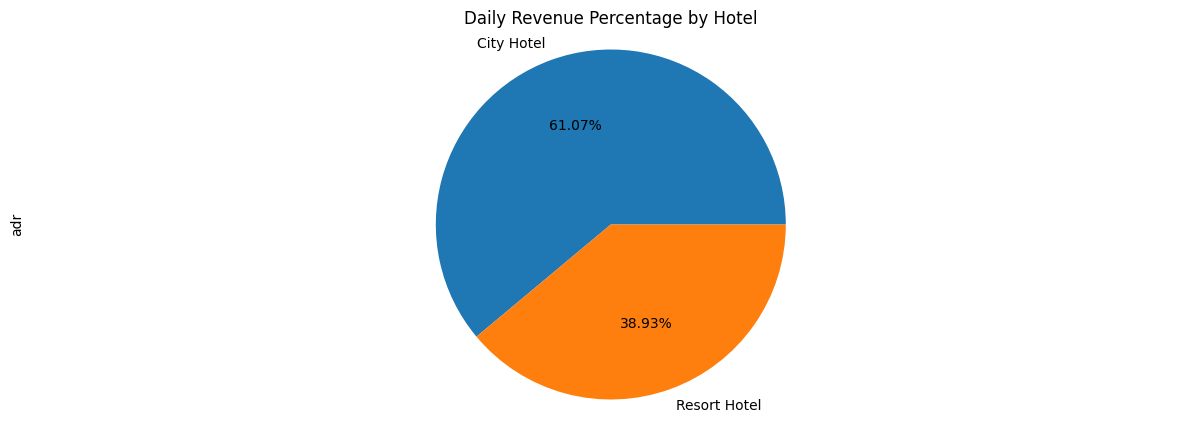

In [ ]:
#couting the revenue for each hotel type using groupby function
most_rev = df1.groupby('hotel')['adr'].count()

#plotting the values in a pie chart
most_rev.plot.pie(autopct='%1.2f%%', figsize=(15,5))

#setting the title
plt.title('Daily Revenue Percentage by Hotel')
plt.axis('equal')
plt.show()

## Waiting Period for Hotels

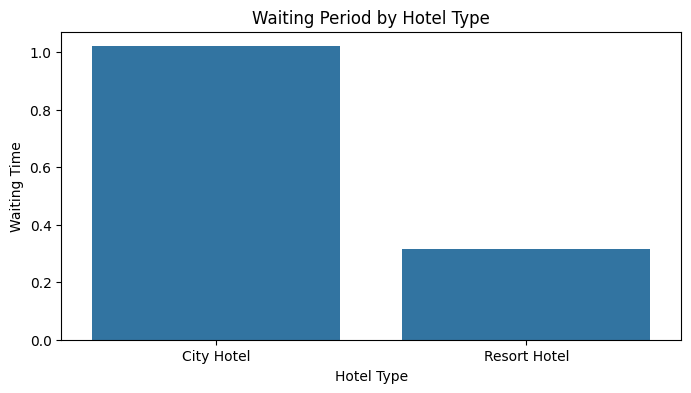

In [ ]:
#grouping by hotel and taking the mean of days in waiting list
waiting_time_df = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

#setting the plot size
plt.figure(figsize=(8,4))

#plotting the bar chart
sns.barplot(x=waiting_time_df['hotel'], y=waiting_time_df['days_in_waiting_list'])

#setting the labels
plt.xlabel('Hotel Type')
plt.ylabel('Waiting Time')
plt.title('Waiting Period by Hotel Type')
plt.show()

Above chart shows that City Hotel has more waiting period. This could be because people stay more in City Hotel, stakeholders should increase rooms in City Hotel or convert some of rooms of Resort Hotel into City Hotel to decrease the waiting period.

## Correlation Heatmap

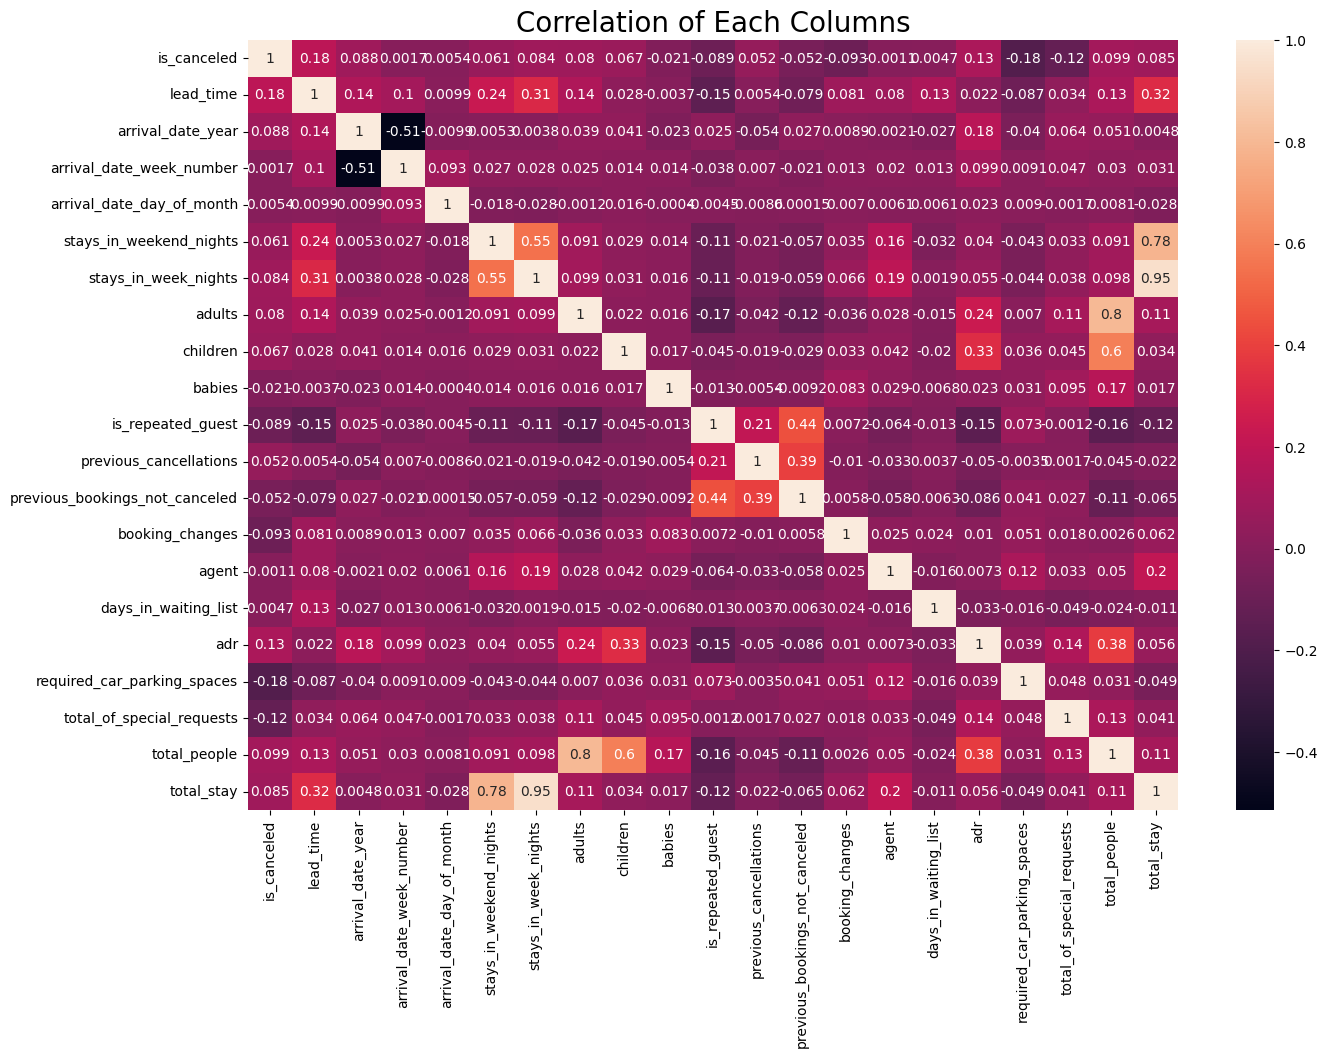

In [ ]:
#setting the chart size
plt.figure(figsize=(15,10))

#creating heatmap to see correlation of each columns
sns.heatmap(df1.corr(numeric_only=True), annot=True)

#setting the title
plt.title('Correlation of Each Columns', fontsize=20)

#show the heatmap
plt.show()

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.
1. lead time and total_stay is positively corelated. that means if customers stay more then the lead time increases.
2. adults, childrens and babies are corelated to each other. That means more the people more will be adr.
3. is_repeated guest and previous bookings not canceled has strong corelation. That means repeated guests don't cancel their bookings.

# **Solution for Business Objective**

1. Given the preference for Resort Hotels, stakeholders may consider offering discounts at City Hotels to stimulate bookings.

2. With approximately 27.52% of bookings resulting in cancellations, the hotel could introduce loyalty incentives to encourage guests to retain their reservations.

3. To streamline operations, it may be beneficial for the hotel to maintain a sufficient stock of raw materials for the BB meal option, which is the most favored choice.

4. Enhancing the room capacity at City Hotels could mitigate wait times and improve guest satisfaction.

5. As TA secures the highest number of bookings among market segments, targeted promotions could attract more bookings from other segments.

6. Since Room Type A is preferred by guests, increasing the availability of such rooms may enhance guest satisfaction.

7. The low number of repeat guests suggests areas for improvement to enhance guest experience and foster guest loyalty.

8. The extended wait times at City Hotels indicate higher demand compared to Resort Hotels, highlighting the need for efficient management of city hotel operations.

9. Given the optimal stay duration of less than 7 days at both hotel types, strategies to accommodate longer stays could improve overall performance.

10. Portugal represents the largest proportion of guests, indicating a significant market presence from this region.

# **Conclusion**

To achieve the business objective effectively, it is advisable for the client to implement dynamic pricing and introduce attractive offers and packages to attract new customers. In order to retain existing customers and ensure repeat business, the client should consider implementing a loyalty points program that customers can redeem on their subsequent bookings. Additionally, enhancing amenities such as parking spaces, a dedicated kids' corner, and complimentary internet connection can help increase the number of bookings.